# Simulated Minimum Distance

In this notebook we illustrate the interface to do point-wise estimates of parameters.

We will use the RandomWalk model as an example. In this model, at each step, the agent can take a forward or a backward step. The probability to do the former is given by `p`.

In [1]:
import torch
import matplotlib.pyplot as plt

from blackbirds.models.random_walk import RandomWalk

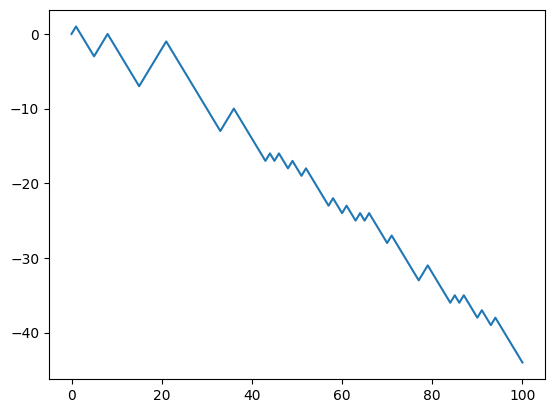

In [2]:
rw = RandomWalk(n_timesteps=100)
# the random walk takes as input the logit of the parameter
p = 0.25
logit_p = torch.logit(torch.tensor([p]))
true_data = rw.run_and_observe(logit_p)

plt.plot(true_data[0])

We now try to recover the true parameter by minimizing the L2 distance between the two time series:

In [3]:
from blackbirds.smd import SMD

In [4]:
initial_parameter = torch.logit(torch.tensor([0.5]))
initial_parameter.requires_grad = True
optimizer = torch.optim.Adam([initial_parameter], lr=1e-2)

smd = SMD(rw, loss_fn = torch.nn.MSELoss(), optimizer=optimizer, progress_bar=True)
smd.run(true_data, n_epochs=1000, max_epochs_without_improvement=100)

 18%|███████████████████████████████████████▋                                                                                                                                                                                      | 179/1000 [00:01<00:07, 105.00it/s, loss=40.4, best loss=4.71, epochs since improv.=100]


In [5]:
# load best parameters
best_parameters = torch.load("best_parameters.pt")
print(f"Best parameters are {torch.sigmoid(best_parameters)}")

Best parameters are tensor([0.3626], grad_fn=<SigmoidBackward0>)


In [8]:
fitted_data = rw.run_and_observe(best_parameters)

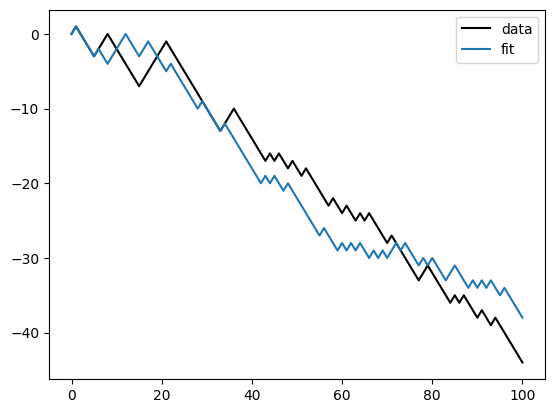

In [9]:
f, ax = plt.subplots()
ax.plot(true_data[0], color = "black", label = "data")
ax.plot(fitted_data[0].detach().cpu().numpy(), color = "C0", label = "fit")
ax.legend()